In [ ]:
import pandas as pd

# Load the uploaded dataset
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Display basic information and first few rows for initial inspection
df_info = df.info()
df_head = df.head()
df_nulls = df.isnull().sum()

df_info, df_head, df_nulls


NameError: name 'files' is not defined

#Data Cleaning

In [ ]:
import pandas as pd

# Load the dataset
file_path = "Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv"
df = pd.read_csv(file_path)

# Step 1: Drop the index column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Step 2: Standardize column names (remove spaces, use underscores, convert to uppercase)
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Step 3: Remove duplicate rows
df.drop_duplicates(inplace=True)

# Step 4: Display basic info
print("DataFrame Info:")
print(df.info())

# Step 5: Preview the first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Optional: Save cleaned data
# df.to_csv("Cleaned_Crime_Data.csv", index=False)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10678 entries, 0 to 10677
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             10678 non-null  object
 1   DISTRICT                                             10678 non-null  object
 2   YEAR                                                 10678 non-null  int64 
 3   MURDER                                               10678 non-null  int64 
 4   ATTEMPT_TO_MURDER                                    10678 non-null  int64 
 5   CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER            10678 non-null  int64 
 6   RAPE                                                 10678 non-null  int64 
 7   CUSTODIAL_RAPE                                       10678 non-null  int64 
 8   OTHER_RAPE                                           10678 n

#EDA

Shape: (10678, 33)
Columns: ['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT_TO_MURDER', 'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER', 'RAPE', 'CUSTODIAL_RAPE', 'OTHER_RAPE', 'KIDNAPPING_&_ABDUCTION', 'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS', 'KIDNAPPING_AND_ABDUCTION_OF_OTHERS', 'DACOITY', 'PREPARATION_AND_ASSEMBLY_FOR_DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO_THEFT', 'OTHER_THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS_HURT', 'DOWRY_DEATHS', 'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY', 'INSULT_TO_MODESTY_OF_WOMEN', 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES', 'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES', 'CAUSING_DEATH_BY_NEGLIGENCE', 'OTHER_IPC_CRIMES', 'TOTAL_IPC_CRIMES']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10678 entries, 0 to 10677
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                           

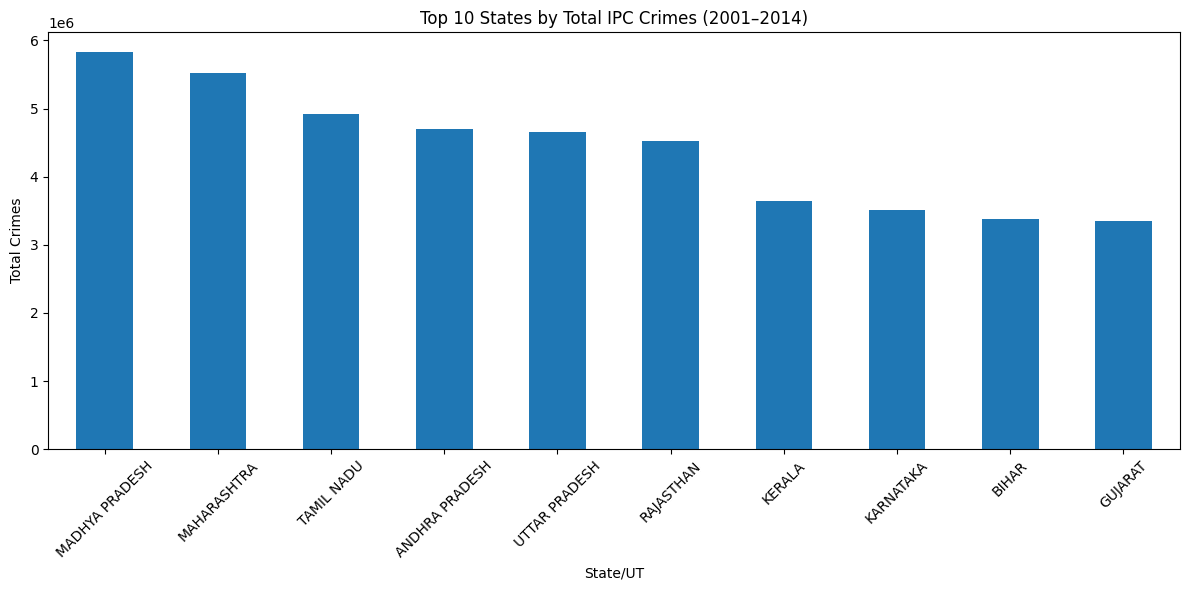

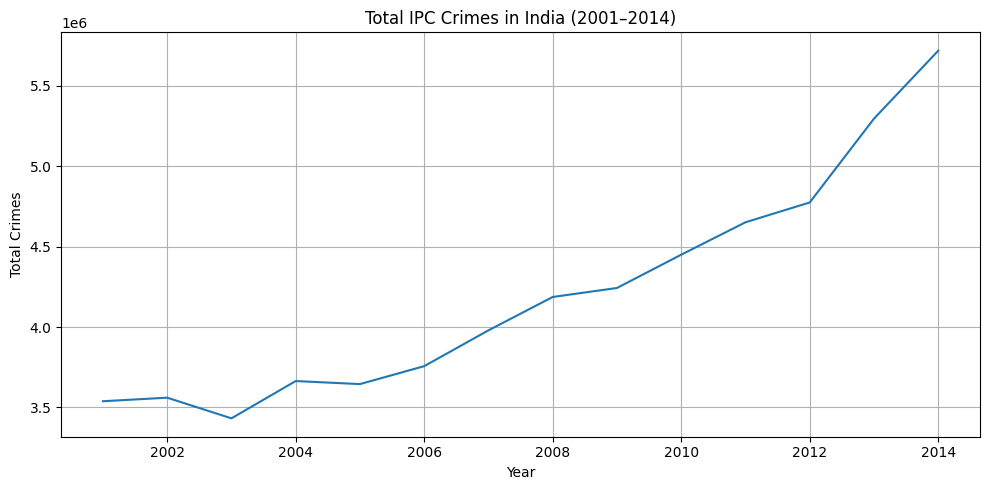

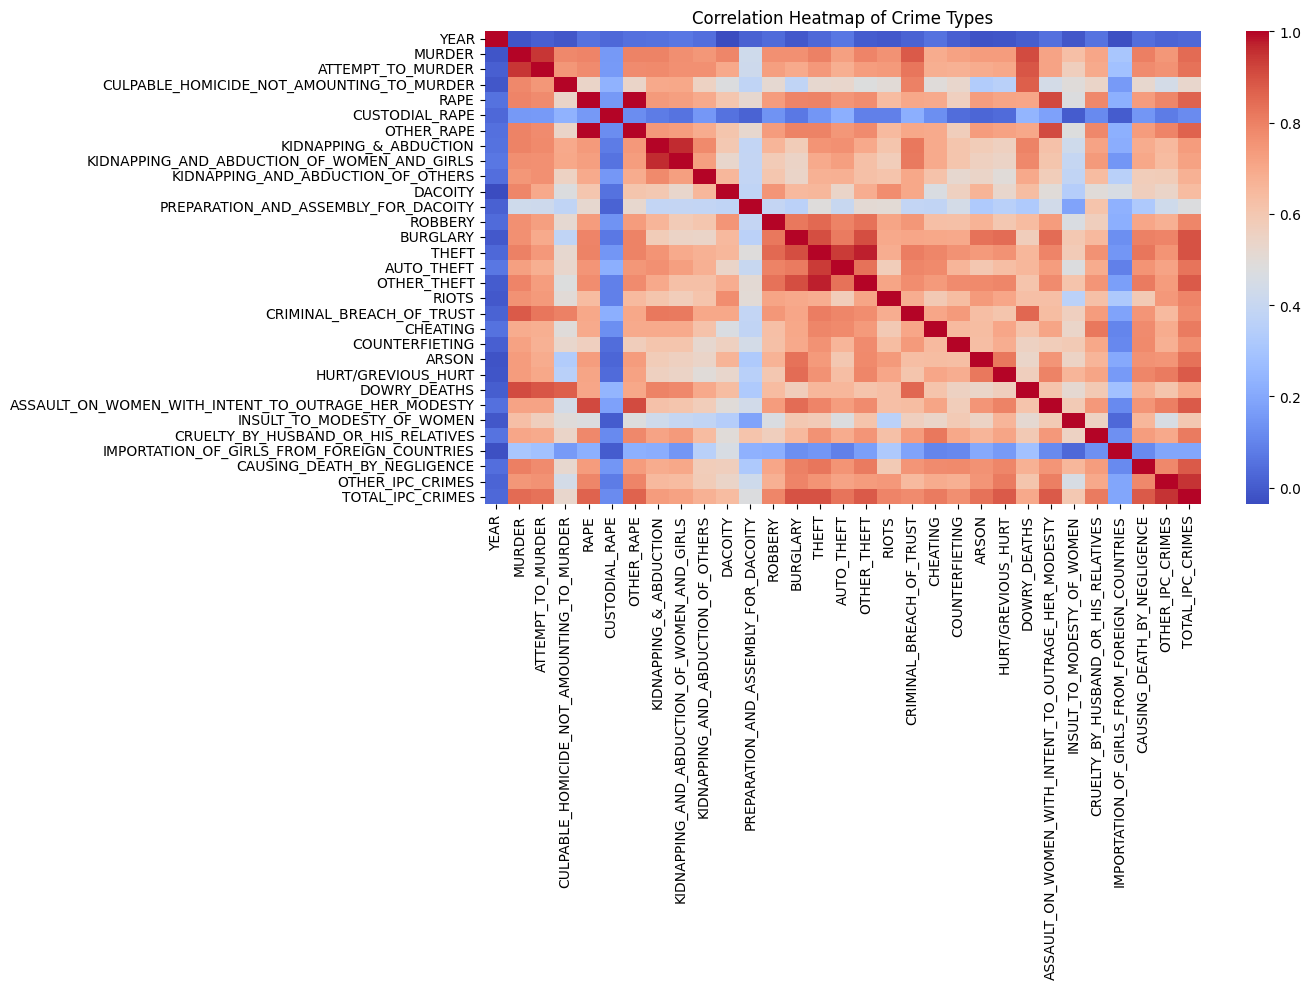

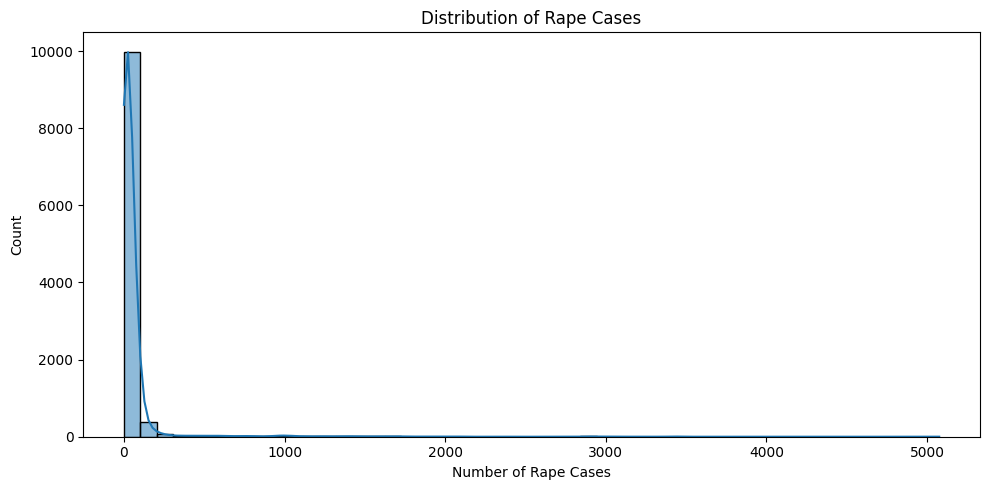

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
file_path = "Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv"
df = pd.read_csv(file_path)

# Clean column names
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df.drop_duplicates(inplace=True)

# --- EDA Steps ---

# 1. Basic Info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())
print(df.describe())

# 2. Check for null values
print("\nNull Values:\n", df.isnull().sum())

# 3. Unique States and Years
print("\nUnique States/UTs:", df["STATE/UT"].nunique())
print("Years Range:", df["YEAR"].min(), "to", df["YEAR"].max())

# 4. Top 10 states with highest total IPC crimes
state_crime = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False)
print("\nTop 10 States by Total Crimes:\n", state_crime.head(10))

# Plot top 10 states
plt.figure(figsize=(12,6))
state_crime.head(10).plot(kind='bar')
plt.title("Top 10 States by Total IPC Crimes (2001–2014)")
plt.xlabel("State/UT")
plt.ylabel("Total Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Trend of crimes over the years
yearly_trend = df.groupby("YEAR")["TOTAL_IPC_CRIMES"].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values)
plt.title("Total IPC Crimes in India (2001–2014)")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(14,10))
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Crime Types")
plt.tight_layout()
plt.show()

# 7. Distribution of a major crime type
plt.figure(figsize=(10,5))
sns.histplot(df["RAPE"], bins=50, kde=True)
plt.title("Distribution of Rape Cases")
plt.xlabel("Number of Rape Cases")
plt.tight_layout()
plt.show()



Data Shape: (10678, 33)

Missing Values:
 STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT_TO_MURDER                                      0
CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER              0
RAPE                                                   0
CUSTODIAL_RAPE                                         0
OTHER_RAPE                                             0
KIDNAPPING_&_ABDUCTION                                 0
KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS            0
KIDNAPPING_AND_ABDUCTION_OF_OTHERS                     0
DACOITY                                                0
PREPARATION_AND_ASSEMBLY_FOR_DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                         

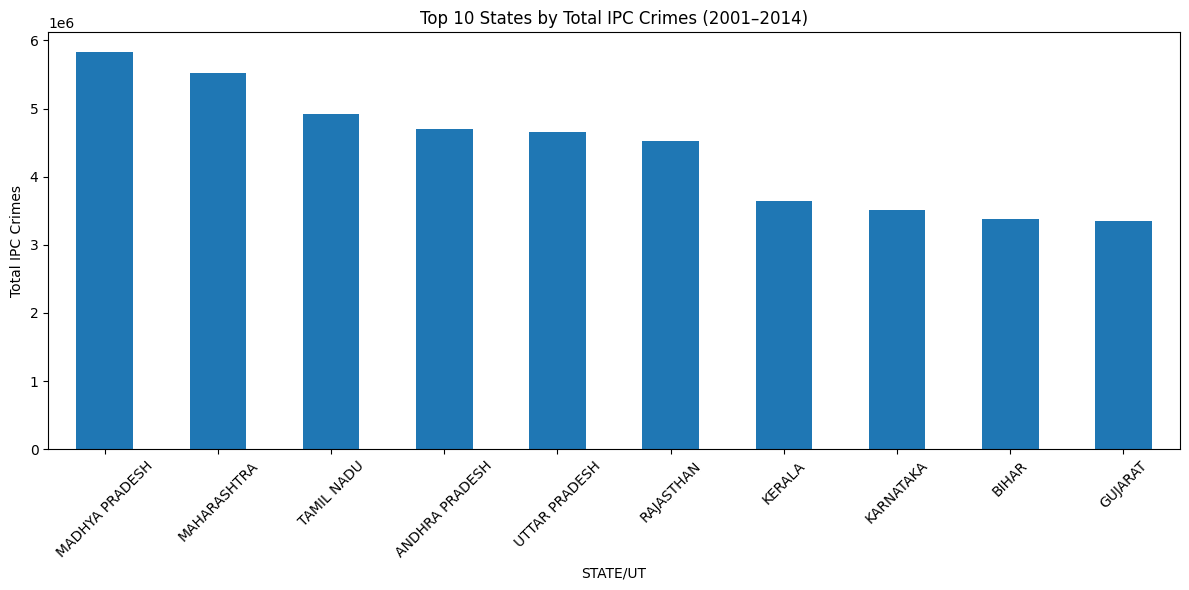

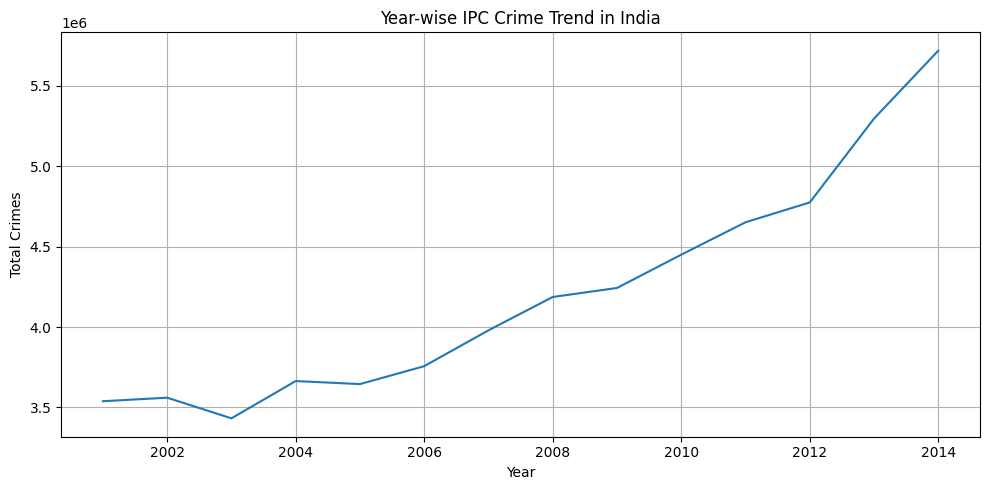

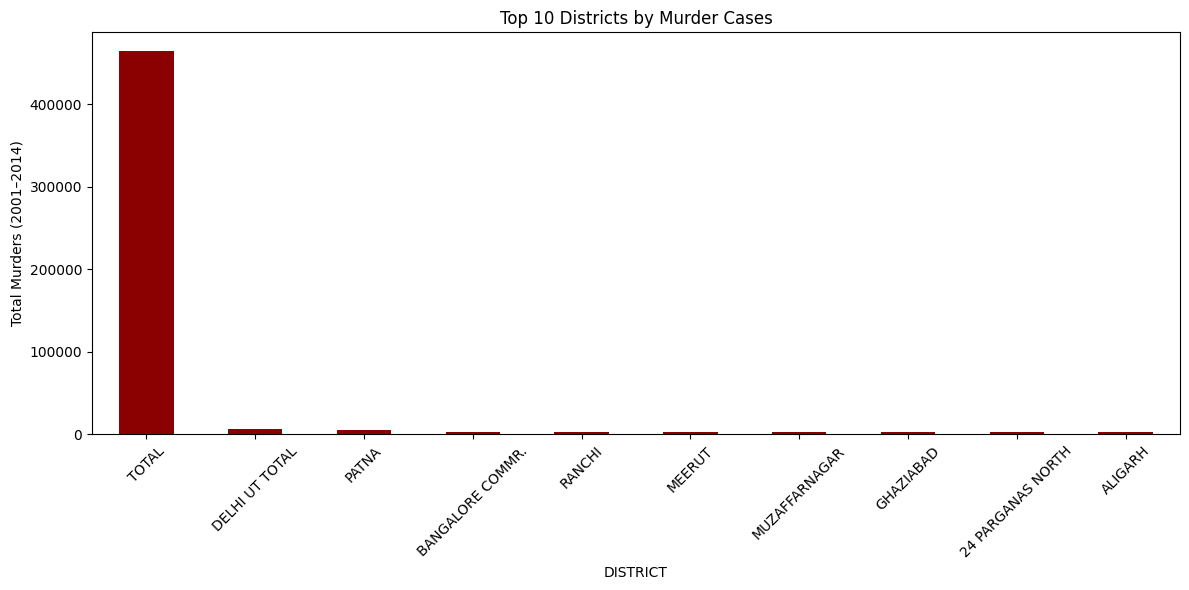

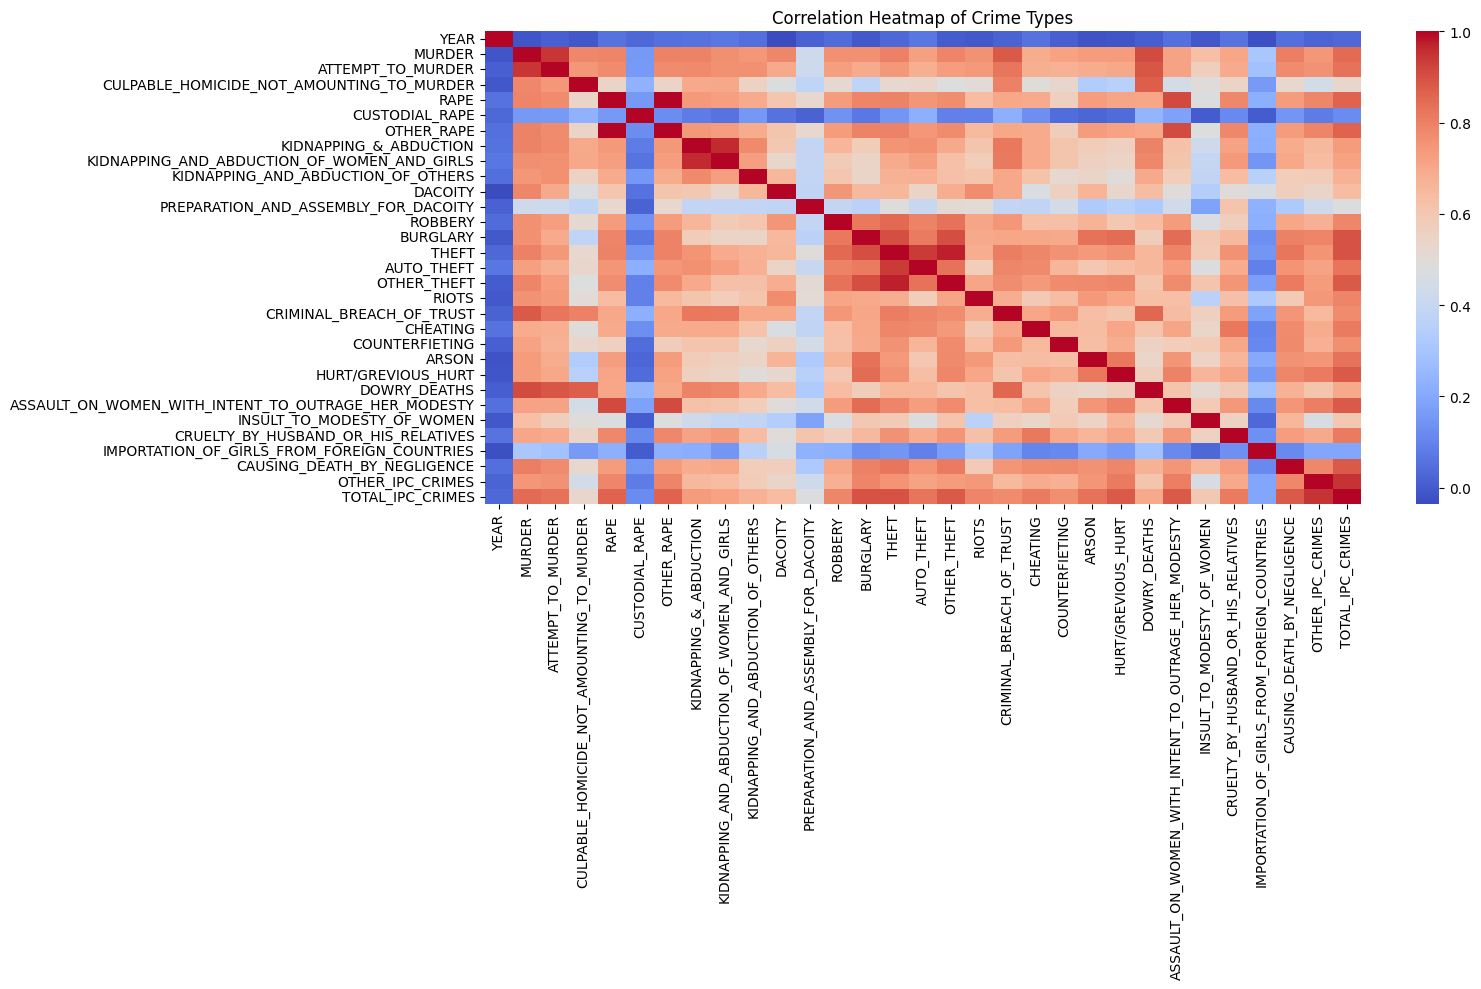

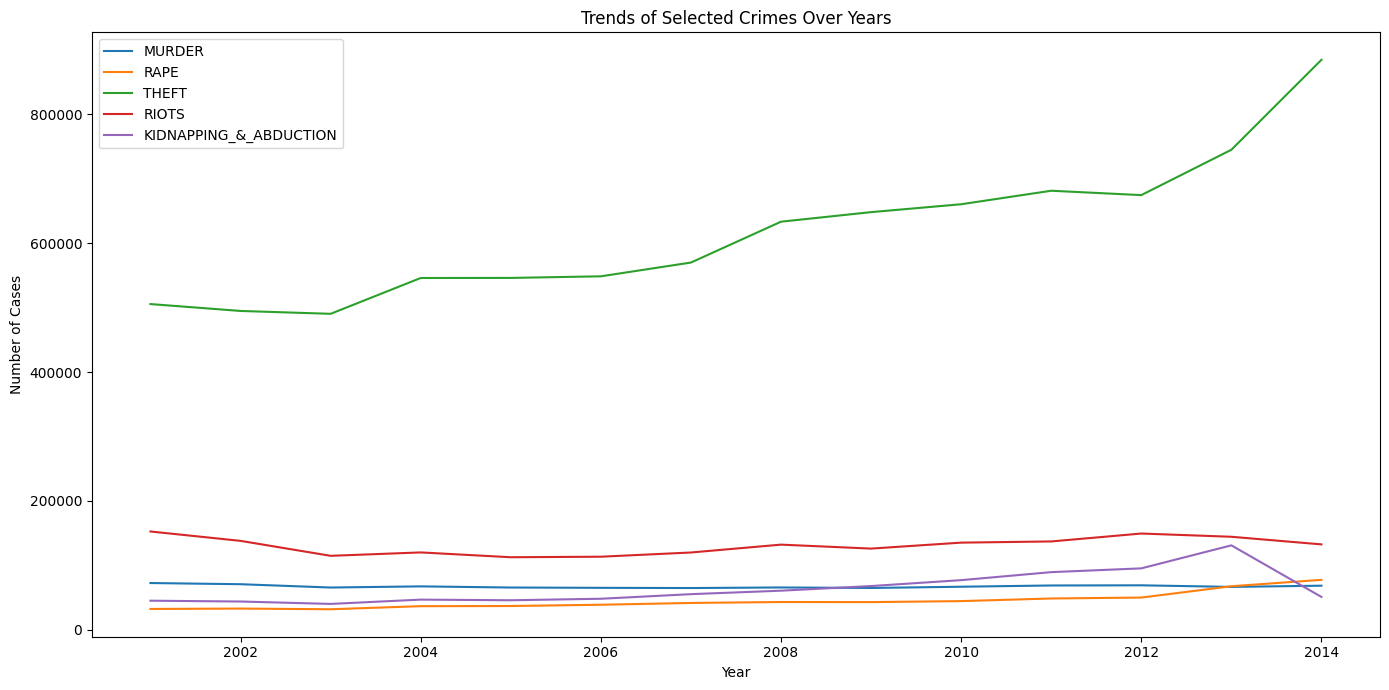

<ipython-input-6-ce9a4cb00122>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rape_states.values, y=top_rape_states.index, palette="magma")


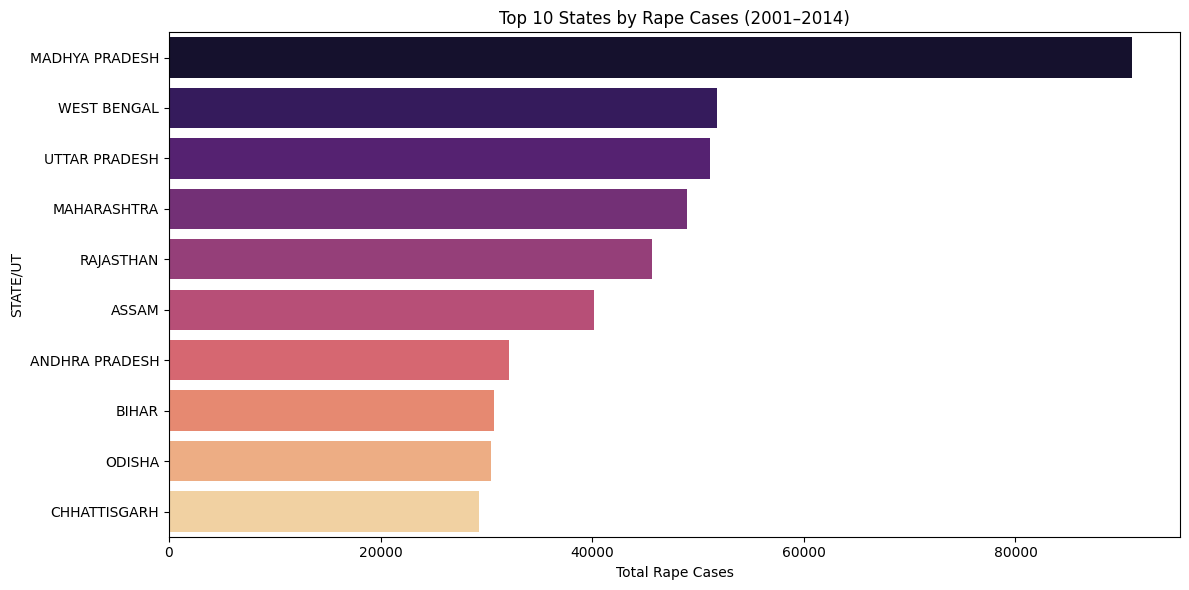

<ipython-input-6-ce9a4cb00122>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_theft_districts.values, y=top_theft_districts.index, palette="Blues_r")


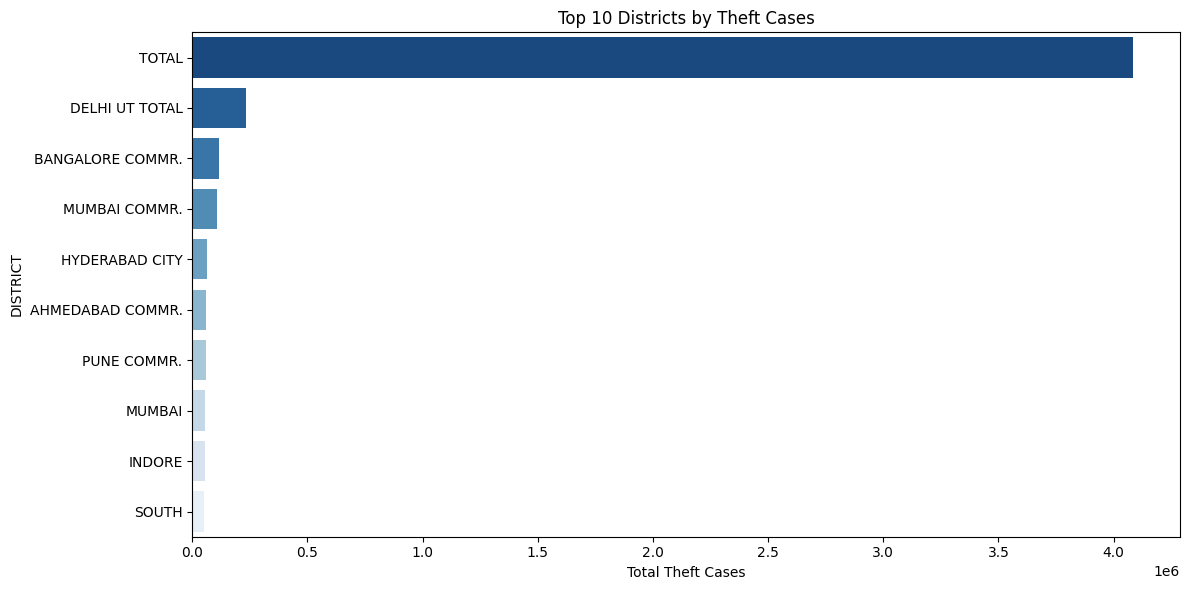

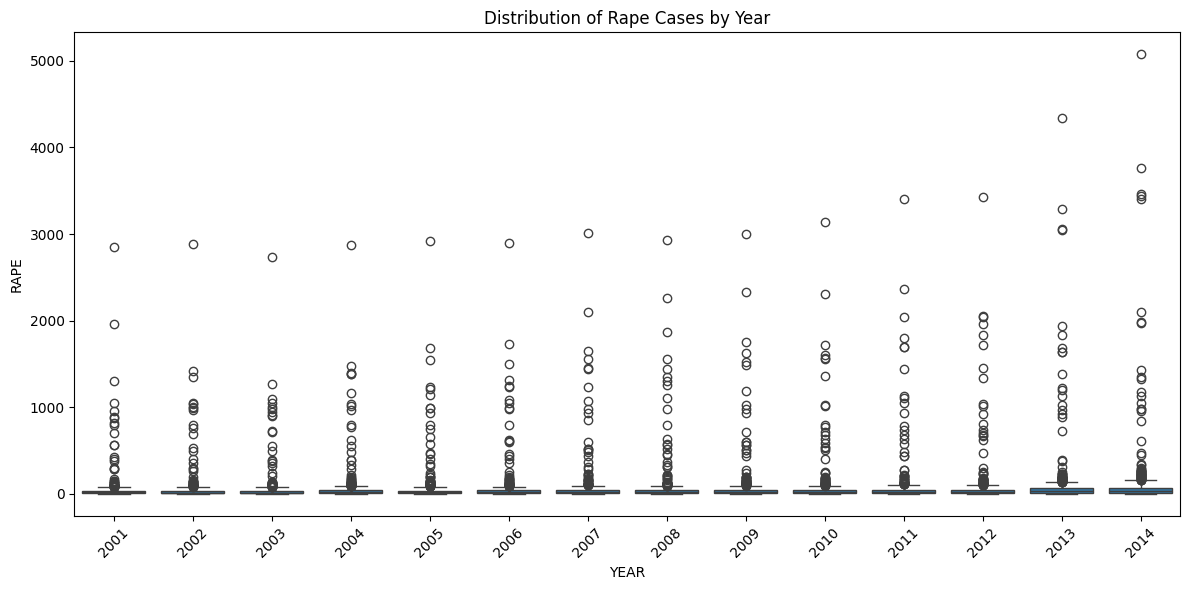

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df.drop_duplicates(inplace=True)

# Basic info
print("Data Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDescriptive Stats:\n", df.describe())

# --------------------------
# 1. Total IPC Crimes by State
# --------------------------
state_crime = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
state_crime.head(10).plot(kind='bar')
plt.title("Top 10 States by Total IPC Crimes (2001–2014)")
plt.ylabel("Total IPC Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------
# 2. Yearly Crime Trend
# --------------------------
yearly = df.groupby("YEAR")["TOTAL_IPC_CRIMES"].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly.index, y=yearly.values)
plt.title("Year-wise IPC Crime Trend in India")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------
# 3. Top 10 Districts by Murder Cases
# --------------------------
top_district_murder = df.groupby("DISTRICT")["MURDER"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
top_district_murder.head(10).plot(kind='bar', color='darkred')
plt.title("Top 10 Districts by Murder Cases")
plt.ylabel("Total Murders (2001–2014)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------
# 4. Heatmap of Correlation Between Crimes
# --------------------------
plt.figure(figsize=(16,10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Crime Types")
plt.tight_layout()
plt.show()

# --------------------------
# 5. Crime Type Trends Over Years
# --------------------------
crime_types = ['MURDER', 'RAPE', 'THEFT', 'RIOTS', 'KIDNAPPING_&_ABDUCTION']
plt.figure(figsize=(14,7))
for crime in crime_types:
    sns.lineplot(data=df.groupby("YEAR")[crime].sum(), label=crime)
plt.title("Trends of Selected Crimes Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------
# 6. State Comparison of Rape Cases (Top 10)
# --------------------------
top_rape_states = df.groupby("STATE/UT")["RAPE"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_rape_states.values, y=top_rape_states.index, palette="magma")
plt.title("Top 10 States by Rape Cases (2001–2014)")
plt.xlabel("Total Rape Cases")
plt.tight_layout()
plt.show()

# --------------------------
# 7. District Comparison for THEFT (Top 10)
# --------------------------
top_theft_districts = df.groupby("DISTRICT")["THEFT"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_theft_districts.values, y=top_theft_districts.index, palette="Blues_r")
plt.title("Top 10 Districts by Theft Cases")
plt.xlabel("Total Theft Cases")
plt.tight_layout()
plt.show()

# --------------------------
# 8. Boxplot of Rape Cases by Year
# --------------------------
plt.figure(figsize=(12,6))
sns.boxplot(x="YEAR", y="RAPE", data=df)
plt.title("Distribution of Rape Cases by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Determine the total number of crimes recorded across all districts and the average number of murders per district.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df.drop_duplicates(inplace=True)

# Assign the cleaned DataFrame to df_cleaned
df_cleaned = df  # This line is crucial to fix the error

# Total number of IPC crimes recorded across all districts
total_crimes = df_cleaned["TOTAL_IPC_CRIMES"].sum()

# Average number of murders per district (aggregated by district)
average_murders = df_cleaned.groupby("DISTRICT")["MURDER"].sum().mean()

print(total_crimes)
print(average_murders)


58894630
985.069182389937


###Examine how crime distributions vary across different states, and identify the top 5 districts with the highest total IPC crimes.


In [ ]:
# Crime distribution by state (total IPC crimes per state)
crime_by_state = df_cleaned.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False)

# Top 5 districts with highest total IPC crimes (across all years)
top_5_districts = df_cleaned.groupby("DISTRICT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False).head(5)

crime_by_state, top_5_districts

(STATE/UT
 MADHYA PRADESH       5827292
 MAHARASHTRA          5515310
 TAMIL NADU           4913910
 ANDHRA PRADESH       4703200
 UTTAR PRADESH        4649988
 RAJASTHAN            4525116
 KERALA               3641164
 KARNATAKA            3510180
 BIHAR                3382686
 GUJARAT              3349190
 WEST BENGAL          2963774
 DELHI UT             1738024
 ODISHA               1588466
 ASSAM                1558574
 HARYANA              1494696
 CHHATTISGARH         1352194
 JHARKHAND            1031788
 PUNJAB                915920
 JAMMU & KASHMIR       616786
 HIMACHAL PRADESH      365716
 UTTARAKHAND           243812
 TELANGANA             213660
 TRIPURA               128886
 PUDUCHERRY            122912
 CHANDIGARH             96210
 MANIPUR                83782
 GOA                    81658
 ARUNACHAL PRADESH      66542
 MEGHALAYA              64374
 MIZORAM                59990
 NAGALAND               31012
 A & N ISLANDS          19428
 SIKKIM                 17832


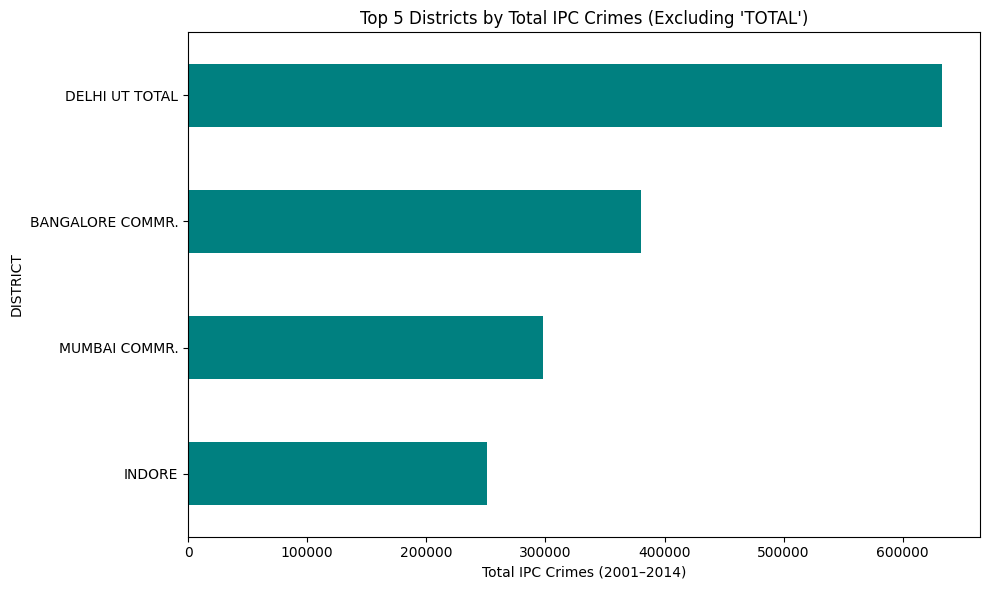

In [ ]:
import matplotlib.pyplot as plt

# Remove the aggregated 'TOTAL' row
top_5_districts_filtered = top_5_districts.drop(labels=["TOTAL"])

# Plotting the top 5 districts excluding the 'TOTAL' row
plt.figure(figsize=(10, 6))
top_5_districts_filtered.plot(kind='barh', color='teal')
plt.xlabel("Total IPC Crimes (2001–2014)")
plt.title("Top 5 Districts by Total IPC Crimes (Excluding 'TOTAL')")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

###Further, analyze how crime patterns differ across various crime categories in urban vs. rural districts (or using a proxy like population if urban/rural data is unavailable) and investigate whether there is a correlation between different crime types such as murder and theft.


Average Crimes by Area Type:
                 MURDER        THEFT       RAPE       RIOTS  TOTAL_IPC_CRIMES
URBAN_RURAL                                                                 
RURAL        89.363619   770.174116  59.266043  171.848866       5443.720615
URBAN        53.987775  1766.048900  35.308068  151.105134       7318.002445


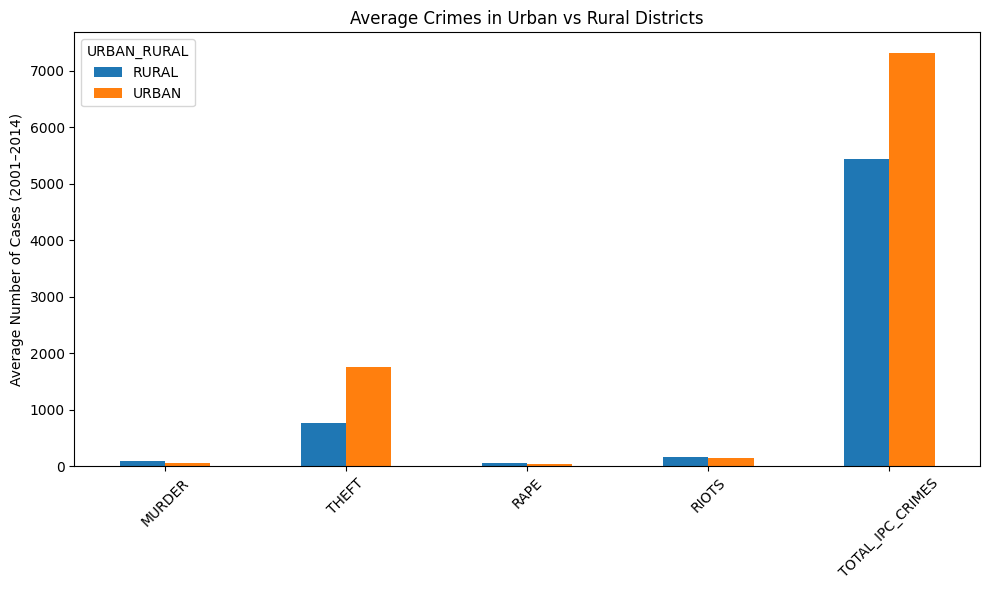


Correlation Between Selected Crime Types:
                           MURDER     THEFT      RAPE     RIOTS  \
MURDER                  1.000000  0.798456  0.791478  0.757300   
THEFT                   0.798456  1.000000  0.796687  0.686931   
RAPE                    0.791478  0.796687  1.000000  0.643125   
RIOTS                   0.757300  0.686931  0.643125  1.000000   
KIDNAPPING_&_ABDUCTION  0.796083  0.754009  0.737072  0.610823   

                        KIDNAPPING_&_ABDUCTION  
MURDER                                0.796083  
THEFT                                 0.754009  
RAPE                                  0.737072  
RIOTS                                 0.610823  
KIDNAPPING_&_ABDUCTION                1.000000  


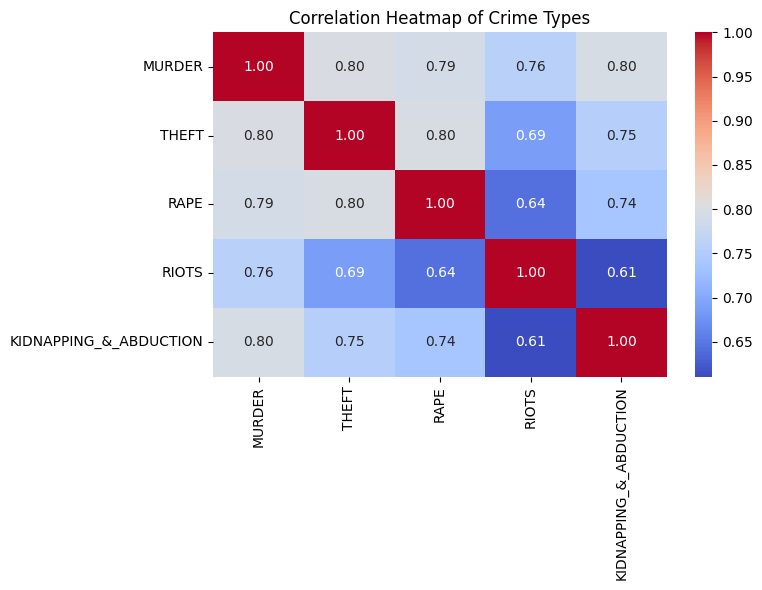

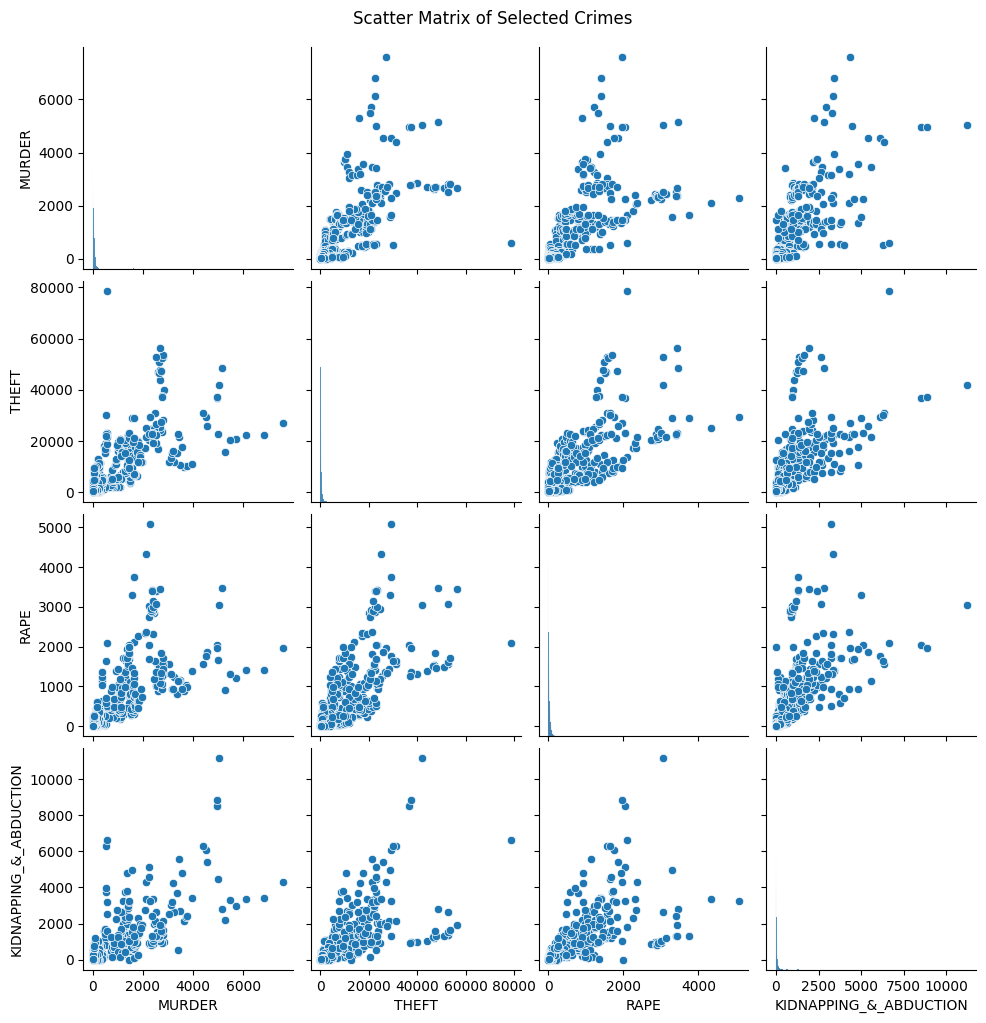

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df.drop_duplicates(inplace=True)

# --- Urban/Rural Proxy using district names ---
urban_keywords = ["COMMR", "CITY", "URBAN", "METRO", "CORPORATION"]
df["URBAN_RURAL"] = df["DISTRICT"].apply(
    lambda x: "URBAN" if any(keyword in x.upper() for keyword in urban_keywords) else "RURAL"
)

# --- Average crime comparison by area type ---
crime_cols = ["MURDER", "THEFT", "RAPE", "RIOTS", "TOTAL_IPC_CRIMES"]
avg_crime_area = df.groupby("URBAN_RURAL")[crime_cols].mean()
print("\nAverage Crimes by Area Type:\n", avg_crime_area)

# --- Plot average crimes for urban vs rural ---
avg_crime_area.T.plot(kind='bar', figsize=(10,6))
plt.title("Average Crimes in Urban vs Rural Districts")
plt.ylabel("Average Number of Cases (2001–2014)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Correlation between selected crime types ---
corr_crimes = df[["MURDER", "THEFT", "RAPE", "RIOTS", "KIDNAPPING_&_ABDUCTION"]].corr()
print("\nCorrelation Between Selected Crime Types:\n", corr_crimes)

# --- Plot the correlation heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(corr_crimes, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Crime Types")
plt.tight_layout()
plt.show()

# Optional: Scatter plot matrix for visual correlation
sns.pairplot(df[["MURDER", "THEFT", "RAPE", "KIDNAPPING_&_ABDUCTION"]])
plt.suptitle("Scatter Matrix of Selected Crimes", y=1.02)
plt.show()



#Visualization

How can visualizations be used to explore crime patterns in India by identifying the top 10 districts with the highest crime rates, understanding the overall distribution of total IPC crimes, analyzing crime density across different states, and comparing trends in violent crimes such as murder and rape across various districts?

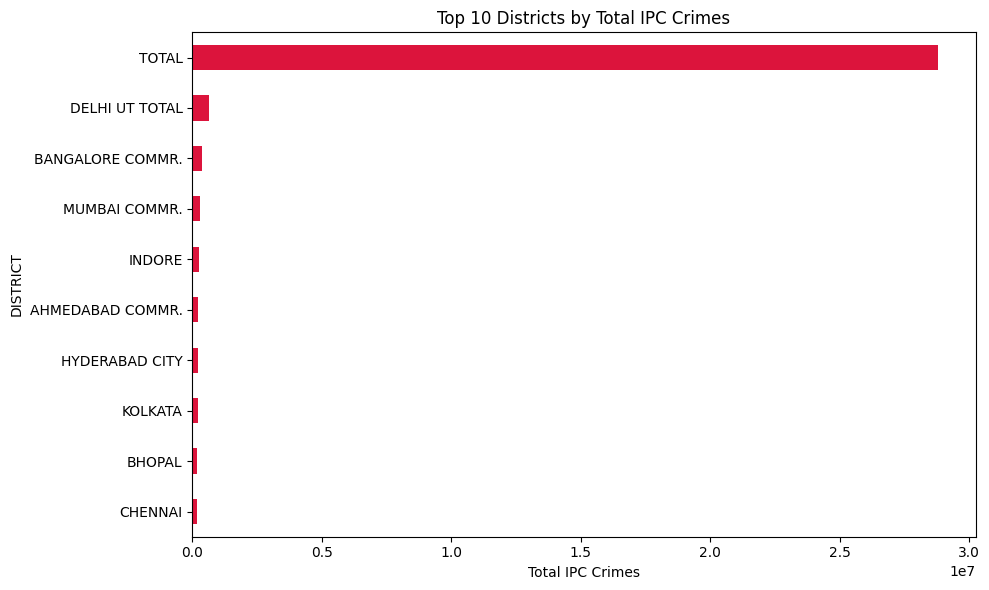

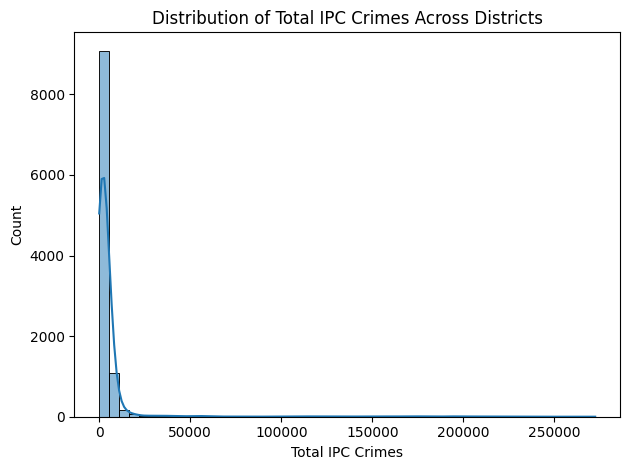

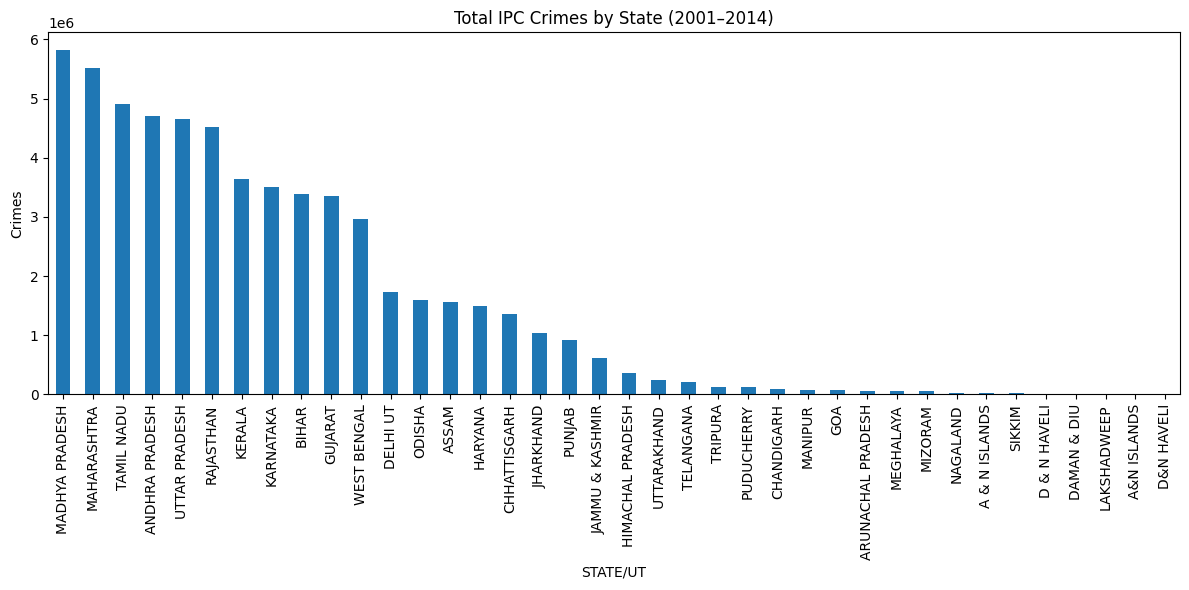

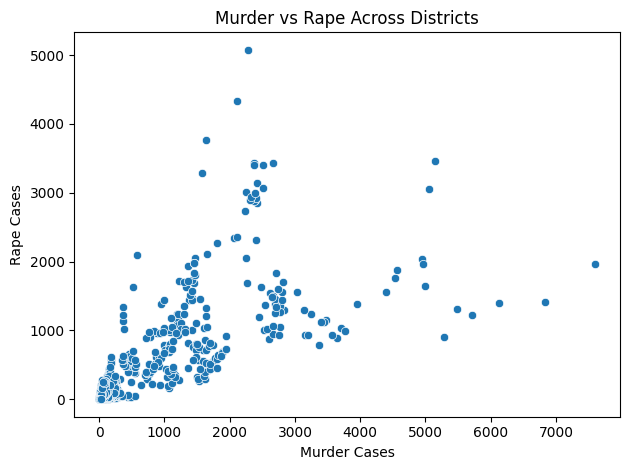

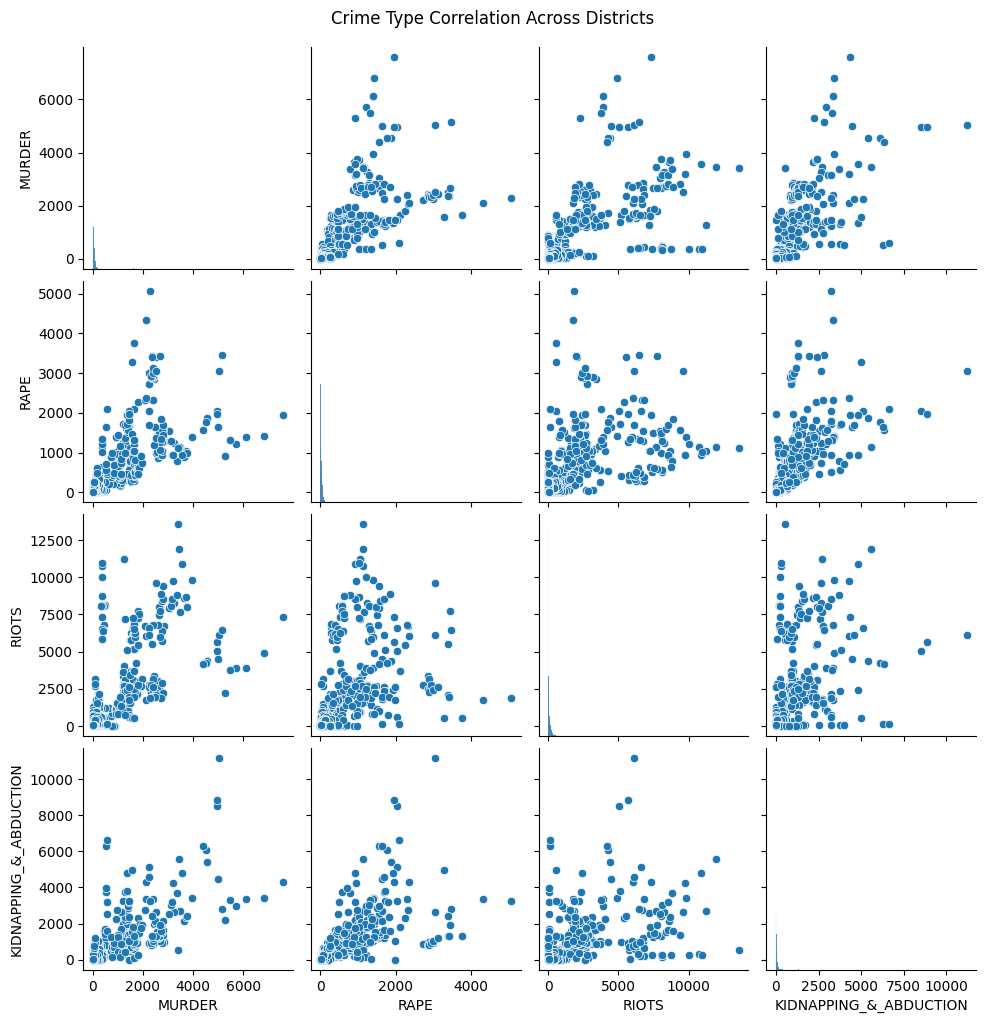

In [ ]:
top_districts = df.groupby("DISTRICT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False).head(10)
top_districts.plot(kind='barh', figsize=(10,6), color='crimson')
plt.title("Top 10 Districts by Total IPC Crimes")
plt.xlabel("Total IPC Crimes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

sns.histplot(df["TOTAL_IPC_CRIMES"], bins=50, kde=True)
plt.title("Distribution of Total IPC Crimes Across Districts")
plt.xlabel("Total IPC Crimes")
plt.tight_layout()
plt.show()

state_crimes = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().sort_values(ascending=False)
state_crimes.plot(kind='bar', figsize=(12,6))
plt.title("Total IPC Crimes by State (2001–2014)")
plt.ylabel("Crimes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

sns.scatterplot(x="MURDER", y="RAPE", data=df)
plt.title("Murder vs Rape Across Districts")
plt.xlabel("Murder Cases")
plt.ylabel("Rape Cases")
plt.tight_layout()
plt.show()

sns.pairplot(df[["MURDER", "RAPE", "RIOTS", "KIDNAPPING_&_ABDUCTION"]])
plt.suptitle("Crime Type Correlation Across Districts", y=1.02)
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load and clean data
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Aggregate total IPC crimes per state per year
state_year_crimes = df.groupby(["YEAR", "STATE/UT"])["TOTAL_IPC_CRIMES"].sum().reset_index()

# Create animated bar chart
fig = px.bar(state_year_crimes,
             x="STATE/UT", y="TOTAL_IPC_CRIMES",
             color="STATE/UT",
             animation_frame="YEAR",
             range_y=[0, state_year_crimes["TOTAL_IPC_CRIMES"].max()],
             title="Animated Total IPC Crimes per State (2001–2014)")
fig.update_layout(xaxis_tickangle=-45, showlegend=False)
fig.show()


Create an interactive dashboard that allows users to filter crime data by year, state, and district.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

df.columns = df.columns.str.strip()

year_options = ["All"] + sorted(df["YEAR"].dropna().unique().astype(str).tolist())
state_options = ["All"] + sorted(df["STATE/UT"].dropna().unique().tolist())
district_options = ["All"] + sorted(df["DISTRICT"].dropna().unique().tolist())

year_widget = widgets.Dropdown(options=year_options, description="Year:")
state_widget = widgets.Dropdown(options=state_options, description="State/UT:")
district_widget = widgets.Dropdown(options=district_options, description="District:")

comp_district_widget1 = widgets.Dropdown(options=district_options, description="District 1:")
comp_district_widget2 = widgets.Dropdown(options=district_options, description="District 2:")

view_widget = widgets.RadioButtons(options=["Table", "Bar Chart", "District Comparison"], description="View:")

def update_district_options(change):
    selected_state = change.new
    if selected_state == "All":
        new_opts = ["All"] + sorted(df["DISTRICT"].dropna().unique().tolist())
    else:
        new_opts = ["All"] + sorted(df[df["STATE/UT"] == selected_state]["DISTRICT"].dropna().unique().tolist())
    district_widget.options = new_opts
    comp_district_widget1.options = new_opts
    comp_district_widget2.options = new_opts

state_widget.observe(update_district_options, names='value')

def dashboard(year, state, district, view, d1, d2):
    filtered_df = df.copy()
    if year != "All":
        try:
            filtered_df = filtered_df[filtered_df["YEAR"] == int(year)]
        except ValueError as ve:
            print("Year conversion error:", ve)
    if state != "All":
        filtered_df = filtered_df[filtered_df["STATE/UT"] == state]
    if view != "District Comparison":
        if district != "All":
            filtered_df = filtered_df[filtered_df["DISTRICT"] == district]
    clear_output(wait=True)
    display(ui)
    if view == "Table":
        print("\nFiltered data (first 5 rows):")
        display(filtered_df.head())
    elif view == "Bar Chart":
        if "TOTAL IPC CRIMES" in filtered_df.columns:
            grp = filtered_df.groupby("DISTRICT")["TOTAL IPC CRIMES"].sum().sort_values(ascending=False)
            plt.figure(figsize=(10,6))
            grp.plot(kind="bar")
            plt.title("Total IPC CRIMES by District")
            plt.xlabel("District")
            plt.ylabel("TOTAL IPC CRIMES")
            plt.tight_layout()
            plt.show()
        else:
            print("Column 'TOTAL IPC CRIMES' not found.")
    elif view == "District Comparison":
        if d1 == "All" or d2 == "All":
            print("Please select two specific districts for comparison.")
            return
        if d1 == d2:
            print("Please select two different districts for comparison.")
            return
        comp_df = filtered_df[filtered_df["DISTRICT"].isin([d1, d2])]
        metrics = [col for col in ["TOTAL IPC CRIMES", "MURDER", "RAPE", "THEFT"] if col in comp_df.columns]
        if not metrics:
            print("No comparison metrics found.")
            return
        comp_table = comp_df.groupby("DISTRICT")[metrics].sum().T
        print("\nDistrict Comparison (aggregated metrics):")
        display(comp_table)
        plt.figure(figsize=(10,6))
        comp_table.plot(kind="bar")
        plt.title("Comparison of Districts")
        plt.xlabel("Crime Metric")
        plt.ylabel("Count")
        plt.legend(title="District")
        plt.tight_layout()
        plt.show()

ui = widgets.VBox([
    widgets.HBox([year_widget, state_widget]),
    widgets.HBox([district_widget]),
    widgets.HBox([comp_district_widget1, comp_district_widget2]),
    view_widget
])
out = widgets.interactive_output(dashboard, {
    'year': year_widget,
    'state': state_widget,
    'district': district_widget,
    'view': view_widget,
    'd1': comp_district_widget1,
    'd2': comp_district_widget2
})
display(ui, out)


Output()

Use a geospatial map to visualize crime hot spots across India. (Matplotlib)

In [ ]:
!wget https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson -O india_states.geojson

--2025-04-13 01:35:17--  https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23017977 (22M) [text/plain]
Saving to: ‘india_states.geojson’

india_states.geojso 100%[===================>]  21.95M  --.-KB/s    in 0.08s   

2025-04-13 01:35:18 (283 MB/s) - ‘india_states.geojson’ saved [23017977/23017977]



<Figure size 1800x2000 with 0 Axes>

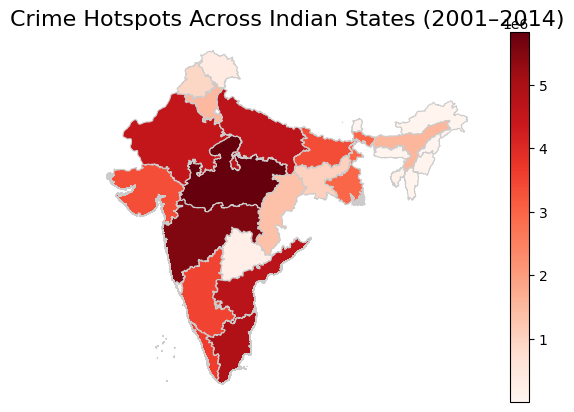

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load GeoJSON of Indian states
gdf = gpd.read_file("india_states.geojson")
# The original code was trying to access a column 'st_name' which doesn't exist
# Replacing 'st_name' with 'NAME_1' which is the actual column name for state names in the GeoJSON file
gdf['NAME_1'] = gdf['NAME_1'].str.upper().str.strip()  # Clean state names

# Prepare crime data by total IPC crimes per state
df["STATE/UT"] = df["STATE/UT"].str.upper().str.strip()
# Access the column using its actual name after cleaning: 'TOTAL_IPC_CRIMES'
state_crimes = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().reset_index()
# Changing the column name to match the GeoJSON file for merging
state_crimes.columns = ["NAME_1", "TOTAL_IPC_CRIMES"]

# Merge shapefile with crime data
# Changing the 'on' parameter to merge on the correct column name
merged = gdf.merge(state_crimes, on="NAME_1", how="left")

# Plot
plt.figure(figsize=(18, 20))
merged.plot(column="TOTAL_IPC_CRIMES",
            cmap="Reds",
            legend=True,
            linewidth=0.8,
            edgecolor='0.8')
plt.title("Crime Hotspots Across Indian States (2001–2014)", fontsize=16)
plt.axis("off")
plt.show()


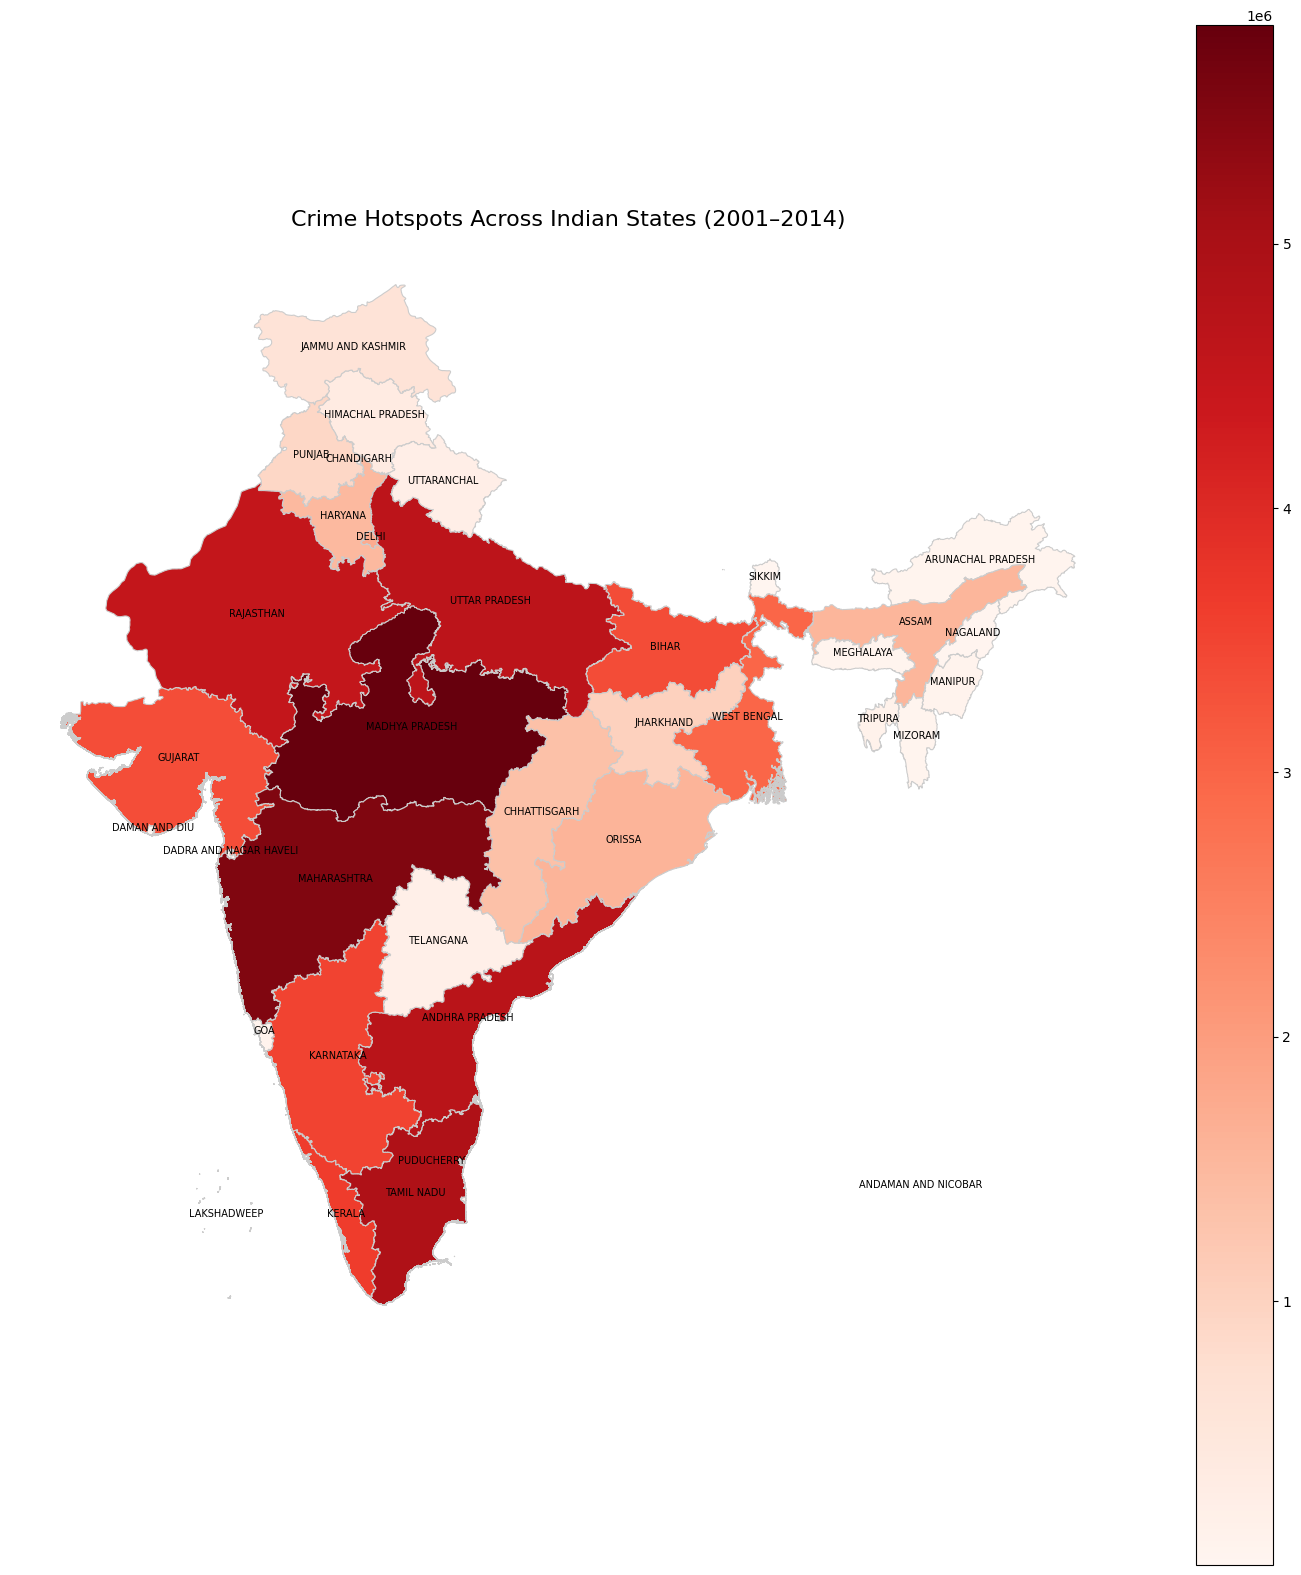

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# STEP 1: Load GeoJSON (India states)
gdf = gpd.read_file("india_states.geojson")
gdf['NAME_1'] = gdf['NAME_1'].str.upper().str.strip()

# STEP 2: Load and clean crime dataset
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df["STATE/UT"] = df["STATE/UT"].str.upper().str.strip()

# STEP 3: Fix mismatched state names
state_name_map = {
    "A & N ISLANDS": "ANDAMAN & NICOBAR",
    "A&N ISLANDS": "ANDAMAN & NICOBAR",
    "D & N HAVELI": "DADRA AND NAGAR HAVELI",
    "D&N HAVELI": "DADRA AND NAGAR HAVELI",
    "DAMAN & DIU": "DAMAN AND DIU",
    "DELHI UT": "DELHI",
    "JAMMU & KASHMIR": "JAMMU AND KASHMIR",
    "ODISHA": "ORISSA",
    "UTTARAKHAND": "UTTARANCHAL"
}
df["STATE/UT"] = df["STATE/UT"].replace(state_name_map)

# STEP 4: Aggregate total IPC crimes per state
state_crimes = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().reset_index()
state_crimes.columns = ["NAME_1", "TOTAL_IPC_CRIMES"]

# STEP 5: Merge GeoJSON with crime data
merged = gdf.merge(state_crimes, on="NAME_1", how="left")

# STEP 6: Plot map
fig, ax = plt.subplots(1, 1, figsize=(18, 20))
merged.plot(column="TOTAL_IPC_CRIMES",
            cmap="Reds",
            linewidth=0.8,
            edgecolor='0.8',
            legend=True,
            ax=ax)

# Add state name labels
for idx, row in merged.iterrows():
    label_point = row["geometry"].centroid
    ax.text(label_point.x, label_point.y, row["NAME_1"], fontsize=7, ha='center', color='black')

# Final tweaks
plt.title("Crime Hotspots Across Indian States (2001–2014)", fontsize=16)
plt.axis("off")
plt.show()



#Advanced Questions

Identify the state with the lowest crime rate and analyze why it might be lower than others.

In [ ]:
# Aggregate total IPC crimes per state
state_crimes = df.groupby("STATE/UT")["TOTAL_IPC_CRIMES"].sum().reset_index()
lowest_state = state_crimes.sort_values("TOTAL_IPC_CRIMES").iloc[0]
print(f"Lowest crime state: {lowest_state['STATE/UT']} with {lowest_state['TOTAL_IPC_CRIMES']} total crimes.")


Lowest crime state: LAKSHADWEEP with 1728 total crimes.


Find the most common type of crime committed in each district.

In [ ]:
# Step 1: Drop 'UNNAMED: 0' if present
df = df.drop(columns=[col for col in df.columns if "UNNAMED" in col.upper()])

# Step 2: Redefine non-crime and crime columns
non_crime_cols = ["STATE/UT", "DISTRICT", "YEAR", "TOTAL_IPC_CRIMES"]
crime_cols = [col for col in df.columns if col not in non_crime_cols]

# Step 3: Group by district and find the most common crime
district_crimes = df.groupby("DISTRICT")[crime_cols].sum()
most_common_crime = district_crimes.idxmax(axis=1)
most_common_crime_count = district_crimes.max(axis=1)

# Step 4: Final result
result = pd.DataFrame({
    "Most_Common_Crime": most_common_crime,
    "Count": most_common_crime_count
})

# Optional: see top results
result.head()



,Most_Common_Crime,Count
DISTRICT,,
24 PARGANAS NORTH,OTHER_IPC_CRIMES,64593
24 PARGANAS SOUTH,OTHER_IPC_CRIMES,67134
A and N ISLANDS,OTHER_IPC_CRIMES,337
ADILABAD,OTHER_IPC_CRIMES,24308
AGAR,OTHER_IPC_CRIMES,1385


In [ ]:
# Remove 'OTHER_IPC_CRIMES' from analysis
crime_cols = [col for col in crime_cols if col != "OTHER_IPC_CRIMES"]

# Re-run groupby and max
district_crimes = df.groupby("DISTRICT")[crime_cols].sum()
most_common_crime = district_crimes.idxmax(axis=1)
most_common_crime_count = district_crimes.max(axis=1)

result_specific = pd.DataFrame({
    "Most_Common_Crime": most_common_crime,
    "Count": most_common_crime_count
})

result_specific.head()


,Most_Common_Crime,Count
DISTRICT,,
24 PARGANAS NORTH,THEFT,23336
24 PARGANAS SOUTH,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,20650
A and N ISLANDS,THEFT,112
ADILABAD,HURT/GREVIOUS_HURT,18847
AGAR,HURT/GREVIOUS_HURT,319


Apply clustering algorithms (e.g., K-Means) to group districts based on crime patterns.

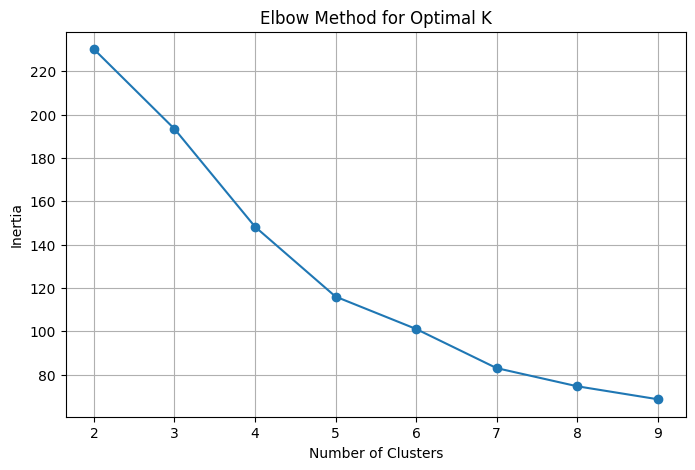

Cluster
0    944
2      8
3      1
1      1
Name: count, dtype: int64


,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_&_ABDUCTION,KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS,KIDNAPPING_AND_ABDUCTION_OF_OTHERS,DACOITY,...,COUNTERFIETING,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES
Cluster,,,,,,,,,,,,,,,,,,,,,
0,492.270127,449.258475,52.185381,333.188559,0.102754,330.65678,489.174788,363.647246,140.377119,71.960805,...,32.899364,139.472458,4.034554e+03,111.273305,644.099576,154.044492,1.185679e+03,0.770127,1.298060e+03,1.265261e+04
1,463673.000000,424015.000000,50460.000000,305098.000000,226.000000,302520.00000,422651.000000,319752.000000,116711.000000,67966.000000,...,30526.000000,131796.000000,3.789895e+06,106161.000000,598771.000000,144694.000000,1.102019e+06,936.000000,1.234715e+06,1.160210e+07
2,1234.875000,985.500000,333.500000,370.125000,16.125000,346.62500,1184.625000,901.000000,267.750000,68.250000,...,62.750000,83.875000,2.631875e+03,464.375000,709.500000,327.250000,1.531875e+03,0.000000,2.821375e+03,1.343162e+04
3,1501.000000,2585.000000,295.000000,455.000000,0.000000,455.00000,1559.000000,561.000000,919.000000,251.000000,...,7.000000,591.000000,4.641000e+03,568.000000,133.000000,32.000000,9.050000e+02,211.000000,1.781000e+03,2.550000e+04


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Drop unwanted columns
df_clean = df.drop(columns=[col for col in df.columns if "UNNAMED" in col.upper()])

# Define relevant crime columns (exclude metadata)
non_crime_cols = ["STATE/UT", "DISTRICT", "YEAR", "TOTAL_IPC_CRIMES"]
crime_cols = [col for col in df_clean.columns if col not in non_crime_cols]

# Aggregate crime data per district
district_data = df_clean.groupby("DISTRICT")[crime_cols].sum()

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(district_data)

# Use elbow method to choose optimal K
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Let's assume K=4 based on the elbow curve
kmeans = KMeans(n_clusters=4, random_state=42)
district_data["Cluster"] = kmeans.fit_predict(scaled_data)

# View cluster assignment
print(district_data["Cluster"].value_counts())
district_data.groupby("Cluster").mean()


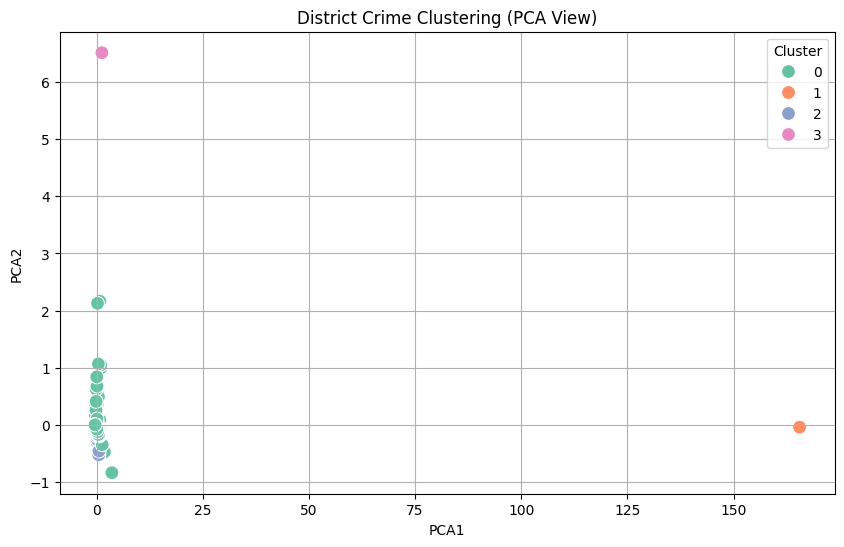

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
district_data["PCA1"] = pca_result[:,0]
district_data["PCA2"] = pca_result[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=district_data, palette="Set2", s=100)
plt.title("District Crime Clustering (PCA View)")
plt.grid(True)
plt.show()


Predict future crime trends using regression analysis.

R² Score: 0.895545091688812
RMSE: 218128.333304097


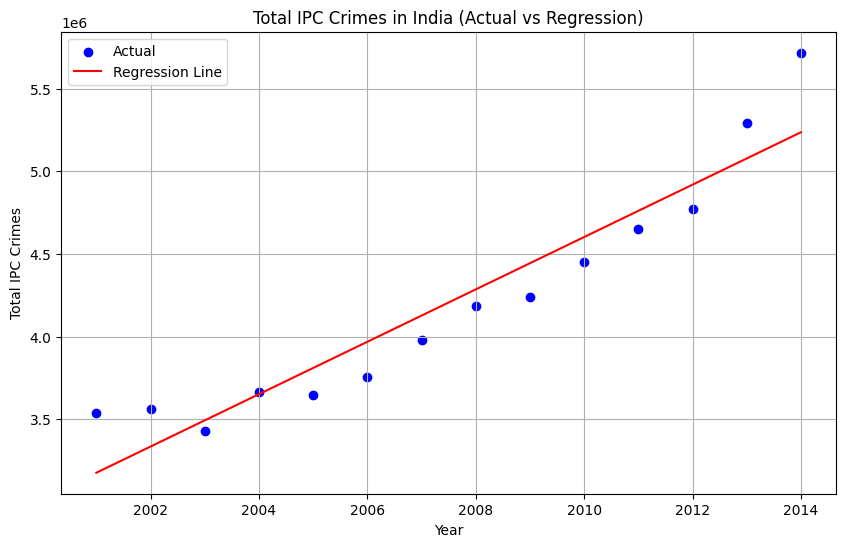

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for square root calculation

# Clean year and crime data
df["YEAR"] = df["YEAR"].astype(int)
yearly_crimes = df.groupby("YEAR")["TOTAL_IPC_CRIMES"].sum().reset_index()

# Feature (X) and target (y)
X = yearly_crimes[["YEAR"]]     # Independent variable
y = yearly_crimes["TOTAL_IPC_CRIMES"]  # Target

model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Model performance
print("R² Score:", r2_score(y, y_pred))
# Calculate RMSE manually using numpy
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Actual", color="blue")
plt.plot(X, y_pred, label="Regression Line", color="red")
plt.title("Total IPC Crimes in India (Actual vs Regression)")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
future_years = pd.DataFrame({"YEAR": list(range(2025, 2031))})
future_predictions = model.predict(future_years)

# Display predictions
for year, crime in zip(future_years["YEAR"], future_predictions):
    print(f"{year}: {int(crime):,} predicted crimes")


2025: 6,979,458 predicted crimes
2026: 7,137,898 predicted crimes
2027: 7,296,338 predicted crimes
2028: 7,454,778 predicted crimes
2029: 7,613,218 predicted crimes
2030: 7,771,658 predicted crimes


Use a machine learning model to classify high-crime and low-crime districts.


Confusion Matrix:
 [[101   0]
 [  1  89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       101
           1       1.00      0.99      0.99        90

    accuracy                           0.99       191
   macro avg       1.00      0.99      0.99       191
weighted avg       0.99      0.99      0.99       191



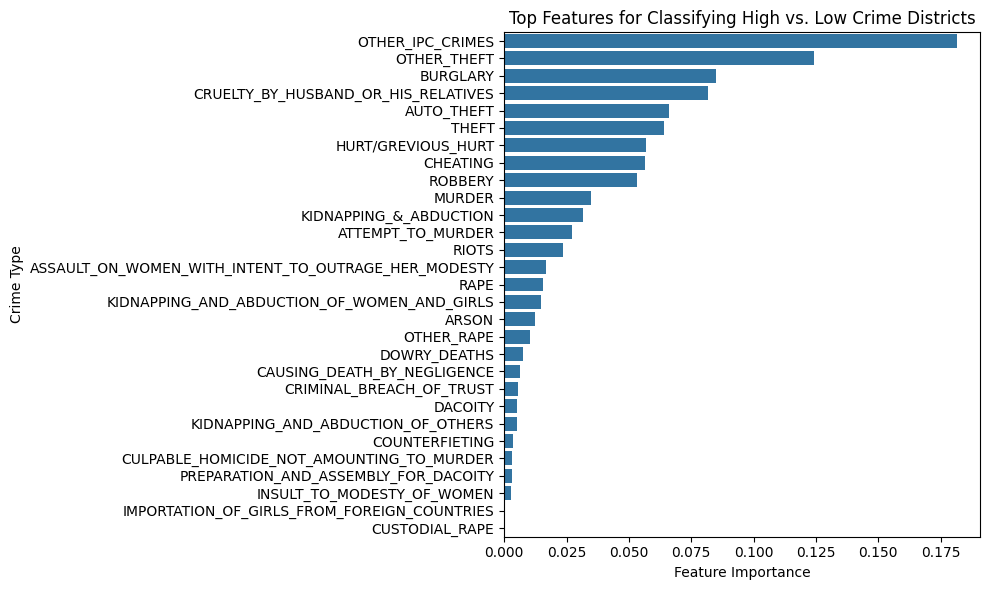

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Remove unnecessary columns
df_clean = df.drop(columns=[col for col in df.columns if "UNNAMED" in col.upper()])
df_clean.columns = df_clean.columns.str.strip().str.upper().str.replace(" ", "_")

# Aggregate crime data by district
non_crime_cols = ["STATE/UT", "DISTRICT", "YEAR", "TOTAL_IPC_CRIMES"]
crime_cols = [col for col in df_clean.columns if col not in non_crime_cols]
district_crimes = df_clean.groupby("DISTRICT")[crime_cols + ["TOTAL_IPC_CRIMES"]].sum()

# Create label: High Crime = 1, Low Crime = 0 (threshold: median)
threshold = district_crimes["TOTAL_IPC_CRIMES"].median()
district_crimes["LABEL"] = (district_crimes["TOTAL_IPC_CRIMES"] > threshold).astype(int)

# Features and labels
X = district_crimes[crime_cols]
y = district_crimes["LABEL"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=crime_cols).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Top Features for Classifying High vs. Low Crime Districts")
plt.xlabel("Feature Importance")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()


Develop a crime risk index for districts based on historical data.

In [ ]:
# Remove rows with names like 'TOTAL' or any rows with extreme outliers
df_clean = df[~df["DISTRICT"].str.contains("TOTAL", case=False, na=False)]


In [ ]:
# Group by district and sum crimes
district_crimes = df_clean.groupby("DISTRICT")["TOTAL_IPC_CRIMES"].sum().reset_index()

# Normalize into 0–100 CRI
min_crime = district_crimes["TOTAL_IPC_CRIMES"].min()
max_crime = district_crimes["TOTAL_IPC_CRIMES"].max()
district_crimes["CRIME_RISK_INDEX"] = ((district_crimes["TOTAL_IPC_CRIMES"] - min_crime) /
                                       (max_crime - min_crime)) * 100
district_crimes["CRIME_RISK_INDEX"] = district_crimes["CRIME_RISK_INDEX"].round(2)

# Sort to check top crime-prone districts
district_crimes.sort_values("CRIME_RISK_INDEX", ascending=False).head(10)


,DISTRICT,TOTAL_IPC_CRIMES,CRIME_RISK_INDEX
75,BANGALORE COMMR.,380665,100.00
594,MUMBAI COMMR.,297871,78.25
368,INDORE,250639,65.84
7,AHMEDABAD COMMR.,239263,62.85
359,HYDERABAD CITY,238226,62.58
497,KOLKATA,211416,55.54
121,BHOPAL,199596,52.43
171,CHENNAI,199075,52.30
679,PATNA,185648,48.77
207,CYBERABAD,181046,47.56


#Bonus Questions


What percentage of crimes are committed against women?


In [ ]:
women_crimes = [
    'RAPE',
    'CUSTODIAL_RAPE',
    'OTHER_RAPE',
    'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS',
    'DOWRY_DEATHS',
    'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY',
    'INSULT_TO_MODESTY_OF_WOMEN',
    'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES'
]

# Sum crimes
total_crimes = df["TOTAL_IPC_CRIMES"].sum()
total_women_crimes = df[women_crimes].sum().sum()

# Calculate percentage
percentage = (total_women_crimes / total_crimes) * 100
print(f"✅ Percentage of crimes against women: {percentage:.2f}%")


✅ Percentage of crimes against women: 9.96%


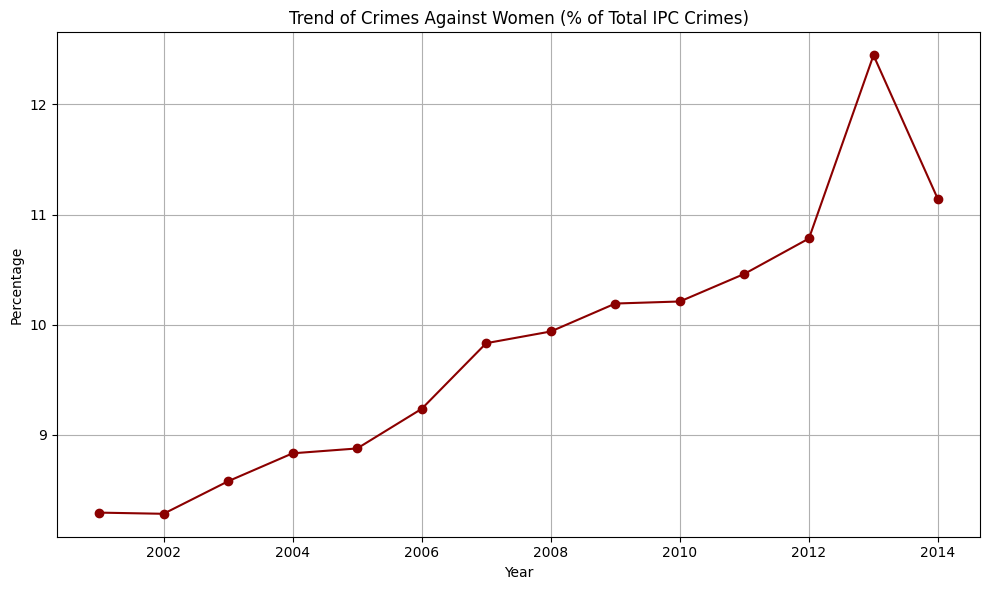

In [ ]:
yearly = df.groupby("YEAR")[women_crimes + ["TOTAL_IPC_CRIMES"]].sum()
yearly["%_WOMEN_CRIMES"] = (yearly[women_crimes].sum(axis=1) / yearly["TOTAL_IPC_CRIMES"]) * 100

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(yearly.index, yearly["%_WOMEN_CRIMES"], marker='o', color='darkred')
plt.title("Trend of Crimes Against Women (% of Total IPC Crimes)")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Group by state and sum women-related crimes and total crimes
statewise = df.groupby("STATE/UT")[women_crimes + ["TOTAL_IPC_CRIMES"]].sum()

# Calculate percentage of crimes against women
statewise["%_WOMEN_CRIMES"] = (statewise[women_crimes].sum(axis=1) / statewise["TOTAL_IPC_CRIMES"]) * 100

# Sort and display
statewise_sorted = statewise.sort_values("%_WOMEN_CRIMES", ascending=False)
statewise_sorted["%_WOMEN_CRIMES"] = statewise_sorted["%_WOMEN_CRIMES"].round(2)
statewise_sorted["%_WOMEN_CRIMES"].head(10)


,%_WOMEN_CRIMES
STATE/UT,
TRIPURA,28.28
WEST BENGAL,19.92
ASSAM,18.83
ORISSA,14.52
UTTARANCHAL,13.86
UTTAR PRADESH,13.21
ANDHRA PRADESH,12.90
MEGHALAYA,12.72
JAMMU AND KASHMIR,12.60


Identify the state with the highest number of dowry deaths.


In [ ]:
# Make sure column is upper case and cleaned
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Group by state and sum dowry deaths
dowry_by_state = df.groupby("STATE/UT")["DOWRY_DEATHS"].sum().reset_index()

# Sort in descending order
dowry_by_state = dowry_by_state.sort_values("DOWRY_DEATHS", ascending=False)

# Display the top state
top_state = dowry_by_state.iloc[0]
print(f"📌 State with the highest number of dowry deaths: {top_state['STATE/UT']} ({top_state['DOWRY_DEATHS']} deaths)")


📌 State with the highest number of dowry deaths: UTTAR PRADESH (57256 deaths)


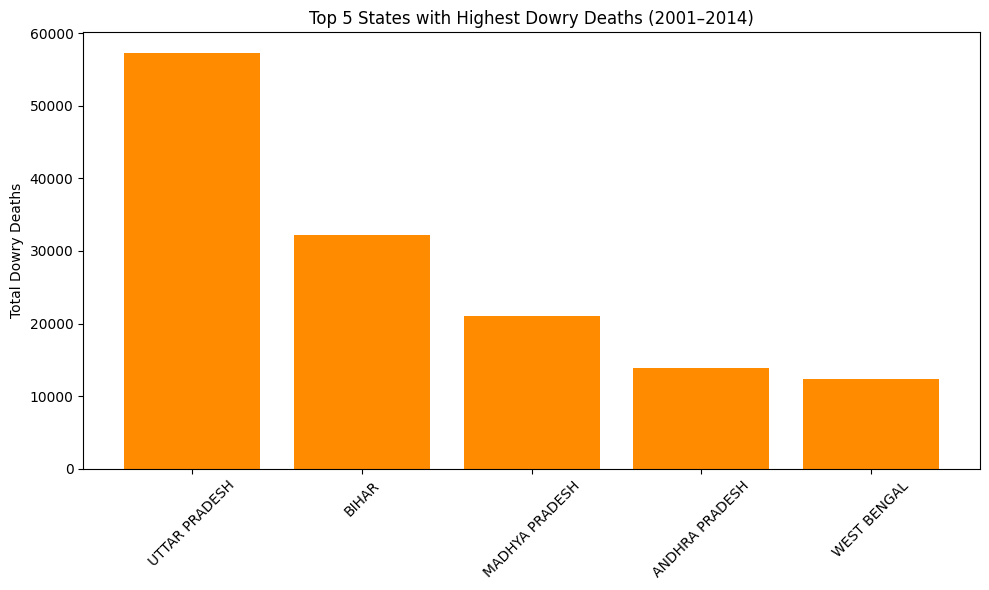

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(dowry_by_state["STATE/UT"].head(5), dowry_by_state["DOWRY_DEATHS"].head(5), color='darkorange')
plt.title("Top 5 States with Highest Dowry Deaths (2001–2014)")
plt.ylabel("Total Dowry Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


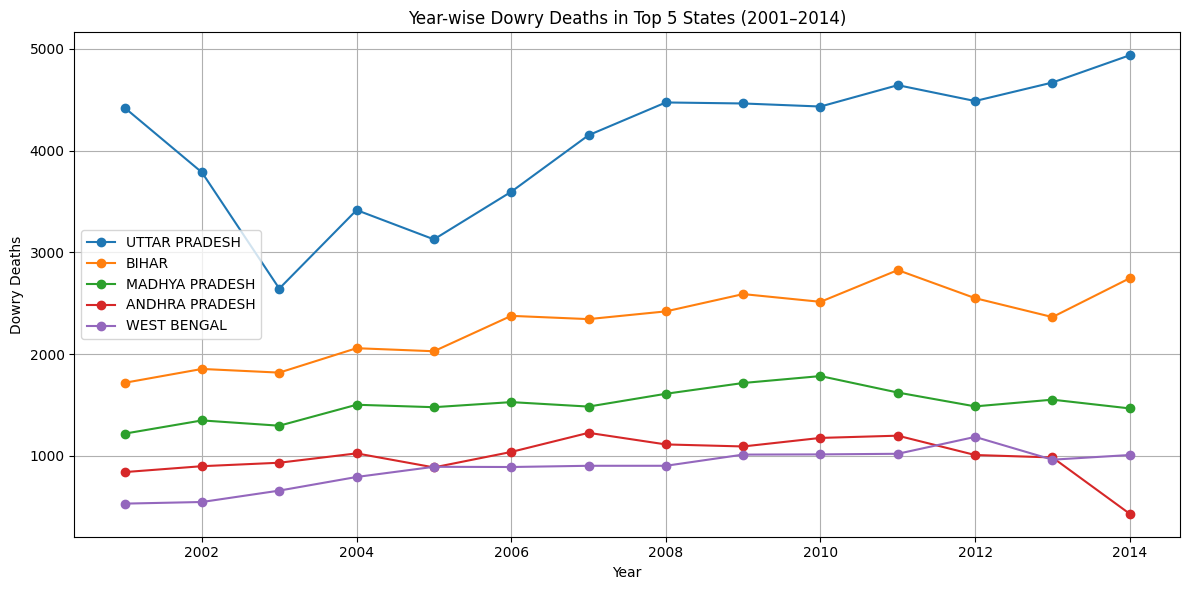

In [ ]:
# Ensure columns are clean
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Create pivot table: rows = YEAR, columns = STATE/UT, values = DOWRY_DEATHS
dowry_trend = df.pivot_table(index="YEAR", columns="STATE/UT", values="DOWRY_DEATHS", aggfunc="sum").fillna(0)
import matplotlib.pyplot as plt

# Pick top 5 states by total dowry deaths
top_states = dowry_trend.sum().sort_values(ascending=False).head(5).index

# Plot trends for top 5 states
plt.figure(figsize=(12,6))
for state in top_states:
    plt.plot(dowry_trend.index, dowry_trend[state], marker='o', label=state)

plt.title("Year-wise Dowry Deaths in Top 5 States (2001–2014)")
plt.xlabel("Year")
plt.ylabel("Dowry Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analyze seasonal variations in crime trends (e.g., do crimes increase during certain months?).


Examine if there is a link between cities and crime rates.

In [ ]:
major_cities = [
    "DELHI", "MUMBAI COMMR.", "BANGALORE COMMR.", "CHENNAI", "HYDERABAD CITY",
    "KOLKATA", "AHMEDABAD COMMR.", "PUNE COMMR.", "LUCKNOW", "INDORE", "JAIPUR", "BHOPAL"
]


In [ ]:
# Clean district names
df["DISTRICT"] = df["DISTRICT"].str.upper().str.strip()

# Tag districts
df["IS_CITY"] = df["DISTRICT"].isin(major_cities)

# Aggregate total crimes
city_stats = df.groupby("IS_CITY")["TOTAL_IPC_CRIMES"].sum().reset_index()
city_stats["LABEL"] = city_stats["IS_CITY"].map({True: "Major Cities", False: "Other Districts"})
city_stats.drop("IS_CITY", axis=1, inplace=True)
city_stats


,TOTAL_IPC_CRIMES,LABEL
0,56463685,Other Districts
1,2430945,Major Cities


In [ ]:
city_pct = (city_stats.loc[city_stats["LABEL"]=="Major Cities", "TOTAL_IPC_CRIMES"].values[0] /
            df["TOTAL_IPC_CRIMES"].sum()) * 100
print(f"📌 % of total IPC crimes from major cities: {city_pct:.2f}%")


📌 % of total IPC crimes from major cities: 4.13%


Build a time-series model to forecast crime rates for the next five years.

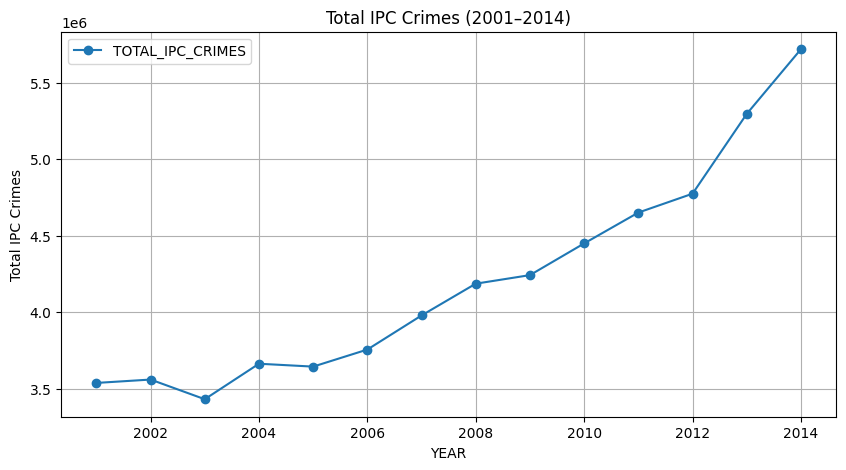

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate total crimes per year
yearly_crimes = df.groupby("YEAR")["TOTAL_IPC_CRIMES"].sum().reset_index()
yearly_crimes.set_index("YEAR", inplace=True)

# Plot the data
yearly_crimes.plot(figsize=(10,5), marker='o', title="Total IPC Crimes (2001–2014)")
plt.ylabel("Total IPC Crimes")
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (auto-tuning can be done, here p=1, d=1, q=1 for simplicity)
model = ARIMA(yearly_crimes, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/

                               SARIMAX Results                                
Dep. Variable:       TOTAL_IPC_CRIMES   No. Observations:                   14
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -176.753
Date:                Sun, 13 Apr 2025   AIC                            359.506
Time:                        01:12:08   BIC                            361.201
Sample:                             0   HQIC                           359.158
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.005    191.649      0.000       0.990       1.010
ma.L1         -0.9986      0.177     -5.643      0.000      -1.345      -0.652
sigma2      1.456e+10   1.08e-11   1.35e+21      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/

📈 Forecasted IPC Crimes (2015–2019):
2015: 5,883,649 cases
2016: 6,049,417 cases
2017: 6,215,181 cases
2018: 6,380,942 cases
2019: 6,546,699 cases


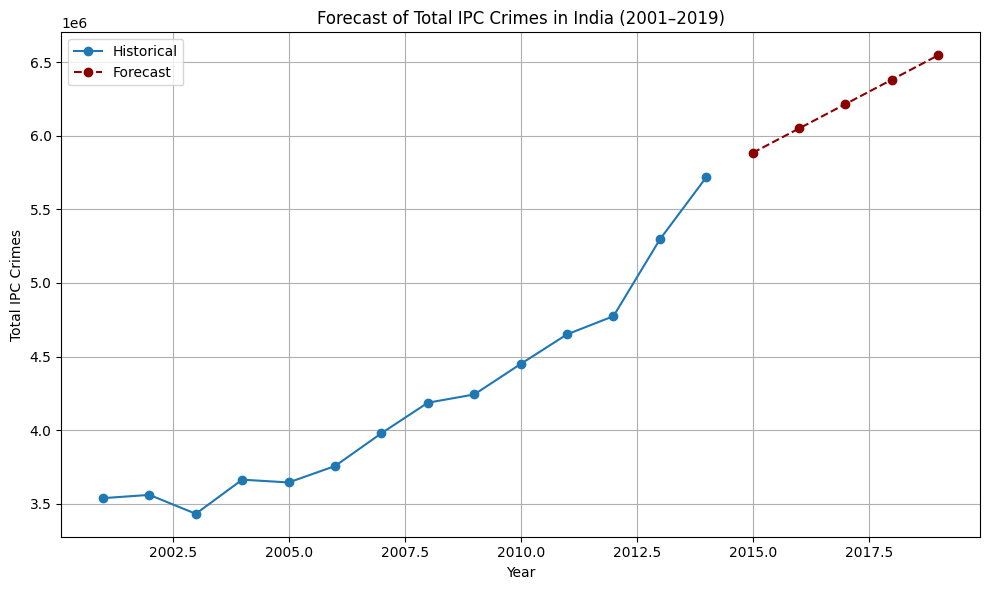

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 2: Prepare yearly crime totals
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
yearly_crimes = df.groupby("YEAR")["TOTAL_IPC_CRIMES"].sum().reset_index()
yearly_crimes.set_index("YEAR", inplace=True)

# Step 3: Fit ARIMA model (order can be tuned)
model = ARIMA(yearly_crimes, order=(1, 1, 1))
model_fit = model.fit()

# Step 4: Forecast next 5 years (2015–2019)
forecast = model_fit.forecast(steps=5)
forecast.index = range(2015, 2020)

# Combine with original data
full_data = pd.concat([yearly_crimes, forecast.rename("FORECAST")], axis=0)

# Step 5: Print forecasted numbers
print("📈 Forecasted IPC Crimes (2015–2019):")
for year, value in forecast.items():
    print(f"{year}: {int(value):,} cases")

# Step 6: Plot
plt.figure(figsize=(10,6))
plt.plot(yearly_crimes, label="Historical", marker='o')
plt.plot(forecast, label="Forecast", linestyle='--', marker='o', color='darkred')
plt.title("Forecast of Total IPC Crimes in India (2001–2019)")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
